<a href="https://colab.research.google.com/github/Renmaruu/Renmaruu/blob/main/Learn_Games_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import LIB and Data

In [ ]:
#IMPORT LIB
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#INPUT DATA
sheet_url = "https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913"
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/export?format=csv&gid=1485085913


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


#Data Cleansing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [ ]:
df[df.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,11/1/2015,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [ ]:
df['Release'] = pd.to_datetime(df['Release'])
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


#Data Exploration

##1.oldest and newest game

In [ ]:
oldest_games = df[['Name', 'Release']].sort_values('Release').head()
newest_games = df[['Name', 'Release']].sort_values('Release', ascending = False).head()

print(oldest_games)
print('')
print(newest_games)

                                       Name    Release
133                                 Hydlide 1984-12-01
34   Where in the World Is Carmen Sandiego? 1985-06-01
88                     International Karate 1985-11-01
162                                  Tetris 1988-01-01
22                             Last Ninja 2 1988-08-01

                   Name    Release
20              Valheim 2021-02-01
27       Cyberpunk 2077 2020-12-01
110  Crusader Kings III 2020-09-01
10            Fall Guys 2020-08-01
139             Mordhau 2019-04-01


##2.publisher published the most game

In [ ]:
agg_publisher = df.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending =False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


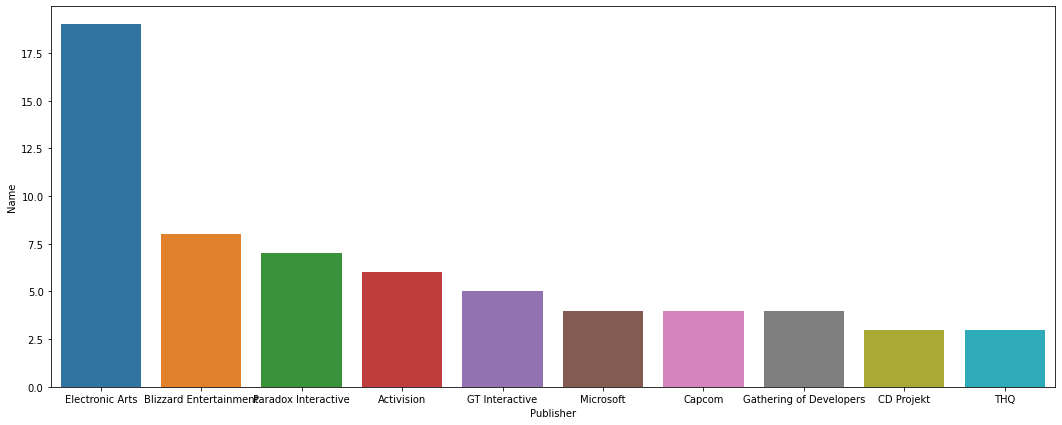

In [ ]:
plt.rcParams['figure.figsize'] = (18,7)
sns.barplot('Publisher', 'Name', data = agg_publisher.sort_values('Name', ascending=False).head(10))

##3.developer developed the most game

In [ ]:
agg_developer = df.groupby('Developer', as_index=False)['Name'].nunique()
agg_developer.sort_values('Name', ascending =False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


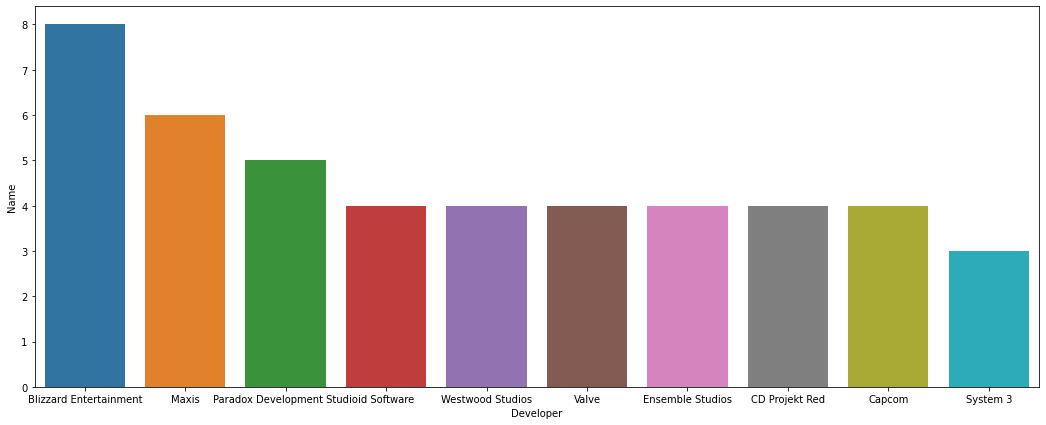

In [ ]:
sns.barplot('Developer', 'Name', data = agg_developer.sort_values('Name', ascending=False).head(10))

##4. series the most sales

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


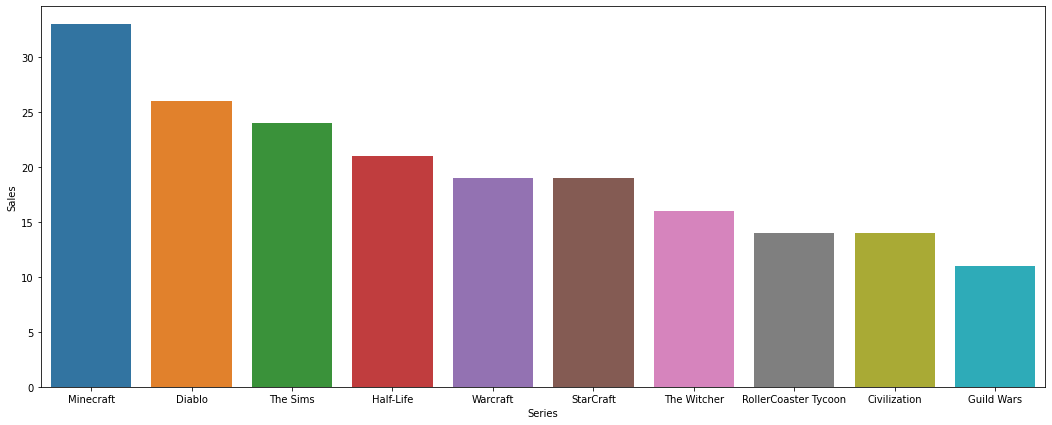

In [ ]:
agg_series = df.groupby('Series', as_index=False).agg({'Sales':'sum', 'Name': 'nunique'})
agg_series.sort_values('Sales', ascending=False)
sns.barplot('Series','Sales', data = agg_series.sort_values('Sales', ascending=False).head(10))

##5. series have the most game

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


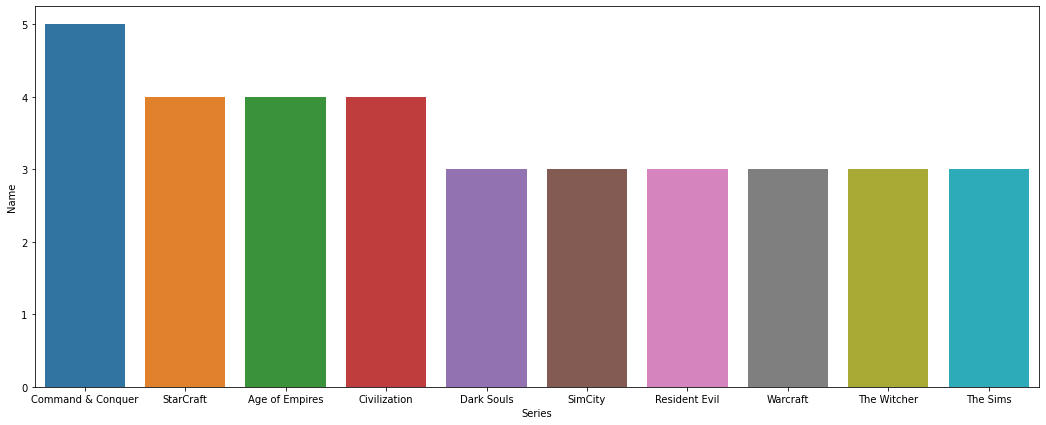

In [ ]:
sns.barplot('Series', 'Name', data = agg_games.sort_values('Name', ascending=False).head(10))

In [ ]:
df.to_csv('Games Sales Clean')